In [1]:
import sys
sys.path.append('../../')

In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [6]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_global.csv')


In [7]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                 17
4           1/22/20                                                 18
..              ...                                                ...
719          1/6/22                                            5480300
720          1/7/22                                            5485330
721          1/8/22                                            5489287
722          1/9/22                                            5495713
723         1/10/22                                            5504387

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
col1 = list(df1.columns.values)
print(col1)
df1 = df1.drop(0)
df1 = df1.drop(1)
df1 = df1.drop(2)
df1 = df1.drop(3)
df1 = df1.drop(723)

df1

['Title', 'Values']


,Title,Values
4,1/22/20,18
5,1/23/20,26
6,1/24/20,42
7,1/25/20,56
8,1/26/20,82
...,...,...
718,1/5/22,5473031
719,1/6/22,5480300
720,1/7/22,5485330
721,1/8/22,5489287


In [10]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y %H:%M:%S") for d in range(719)]
str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [11]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

       Title   Values                 Time
4    1/22/20       18  22-01-2020 00:00:00
5    1/23/20       26  23-01-2020 00:00:00
6    1/24/20       42  24-01-2020 00:00:00
7    1/25/20       56  25-01-2020 00:00:00
8    1/26/20       82  26-01-2020 00:00:00
..       ...      ...                  ...
718   1/5/22  5473031  05-01-2022 00:00:00
719   1/6/22  5480300  06-01-2022 00:00:00
720   1/7/22  5485330  07-01-2022 00:00:00
721   1/8/22  5489287  08-01-2022 00:00:00
722   1/9/22  5495713  09-01-2022 00:00:00

[719 rows x 3 columns]


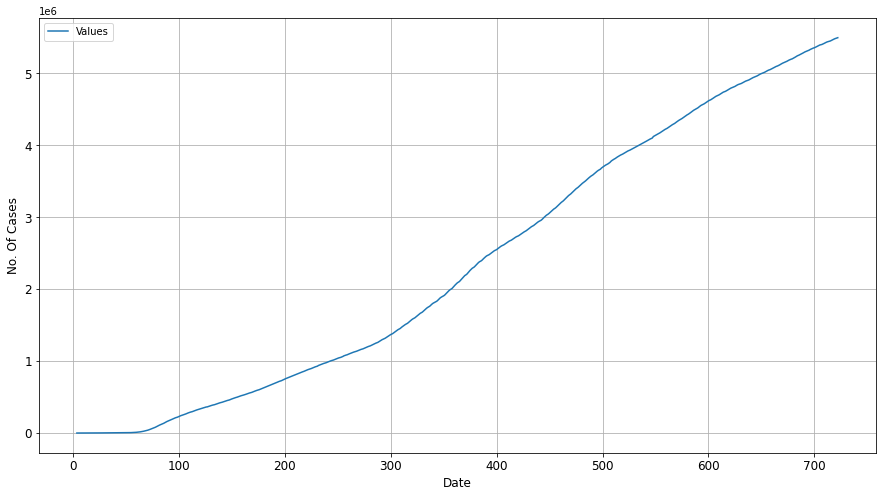

In [12]:
df1.plot(y='Values', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. Of Cases', fontsize=12)
plt.grid()
plt.show()

In [13]:
train_start_dt = '02-10-2021 00:00:00'
test_start_dt = '21-12-2021 00:00:00'

In [15]:
df1.set_index('Time',inplace=True)

In [16]:
df1.tail(100)

,Title,Values
Time,,
02-10-2021 00:00:00,10/2/21,4803894
03-10-2021 00:00:00,10/3/21,4811071
04-10-2021 00:00:00,10/4/21,4818496
05-10-2021 00:00:00,10/5/21,4827763
06-10-2021 00:00:00,10/6/21,4836607
...,...,...
05-01-2022 00:00:00,1/5/22,5473031
06-01-2022 00:00:00,1/6/22,5480300
07-01-2022 00:00:00,1/7/22,5485330


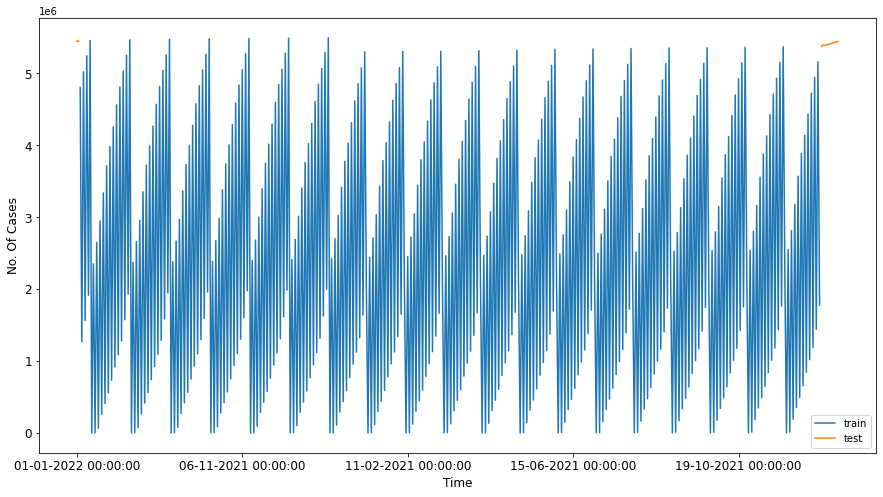

In [17]:
df1[(df1.index < test_start_dt) & (df1.index >= train_start_dt)][['Values']].rename(columns={'Values':'train'}) \
    .join(df1[test_start_dt:][['Values']].rename(columns={'Values':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('No. Of Cases', fontsize=12)
plt.show()

In [18]:
train = df1.copy()[(df1.index >= train_start_dt) & (df1.index < test_start_dt)][['Values']]
test = df1.copy()[df1.index >= test_start_dt][['Values']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (448, 1)
Test data shape:  (228, 1)


In [19]:
scaler = MinMaxScaler()
train['Values'] = scaler.fit_transform(train)

In [20]:
test['Values'] = scaler.transform(test)

In [21]:
# Converting to numpy arrays
train_data = train.values
test_data = test.values

In [22]:
timesteps=5

In [23]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(444, 5)

In [24]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(224, 5)

In [25]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(444, 4) (444, 1)
(224, 4) (224, 1)


In [26]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [27]:
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [28]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(444, 1) (224, 1)


In [29]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

444 224


In [30]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

444 224


In [31]:

train_timestamps = df1[(df1.index < test_start_dt) & (df1.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df1[(df1.index >=test_start_dt)].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

444 224


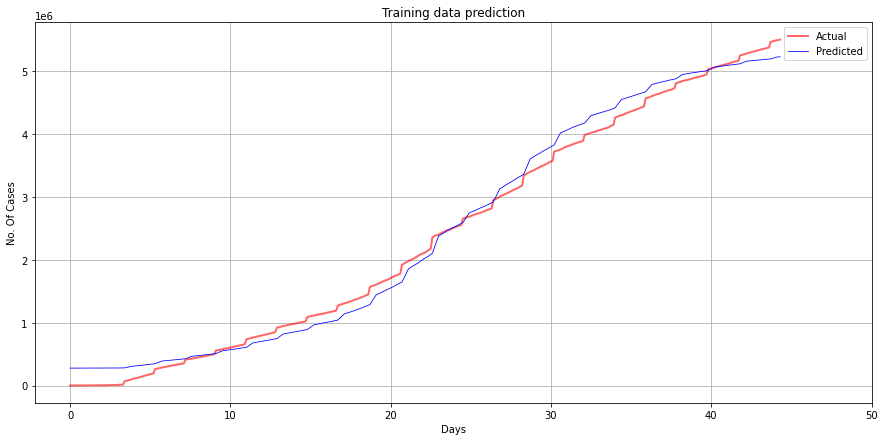

In [32]:
plt.figure(figsize=(15,7))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Days')
plt.ylabel('No. Of Cases')
plt.title("Training data prediction")

x_ticks = [0,100,200,300,400,500]

#specify x-axis labels
x_labels = [0, 10, 20, 30, 40, 50, 60, 70]

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()
plt.show()

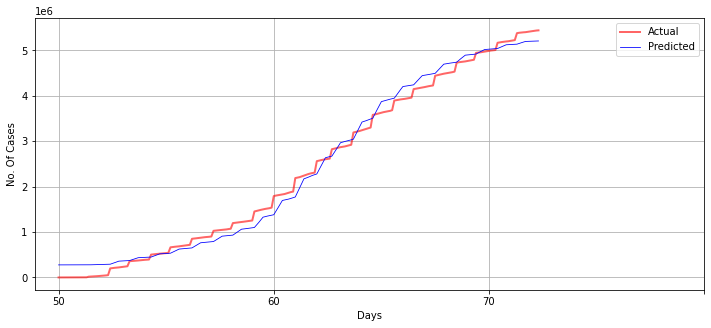

In [33]:
plt.figure(figsize=(12,5))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Days')
plt.ylabel('No. Of Cases')

x_ticks = [0,100,200,300]

#specify x-axis labels
x_labels = [50,60,70]

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()
plt.show()